In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [50]:
df = pd.read_csv("climate_action_data.csv")
print(df.head())

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [51]:
#descriptive statistics
print(f"{df.shape[0]}rows, {df.shape[1]} columns")

print(f"{df.duplicated().sum()} duplicates found..")
df.describe()

913rows, 10 columns
111 duplicates found..


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [52]:
#check for empty cells in the columns
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [53]:
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [54]:
df = df.drop_duplicates()

In [55]:
#handling missing values
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())
        
#for croptype
crop = ['Crop_Type']
for col in crop:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        

In [56]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

  

In [57]:

sensor_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)']
for col in sensor_cols:
    df[col]= df.groupby('Crop_Type')[col].transform(lambda x:x.fillna(x.median()))
    

In [58]:
print(df.describe())

                                Date  Soil_Moisture(%)     Soil_pH  \
count                            798        802.000000  802.000000   
mean   2026-02-04 07:45:33.834586624         44.767756    6.248865   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 06:00:00         26.947500    5.330000   
50%              2026-02-03 12:00:00         45.410000    6.260000   
75%              2026-08-23 18:00:00         62.555000    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.460731    1.021573   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      802.000000   802.000000                     802.000000   
mean        26.461471    60.034539                      87.456983   
min         18.000000    30.000000                      30.000000   
25%         22.300000    46.025000                      57.925000   
50%         26.600000   

In [60]:
#check for empty cells in the columns
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


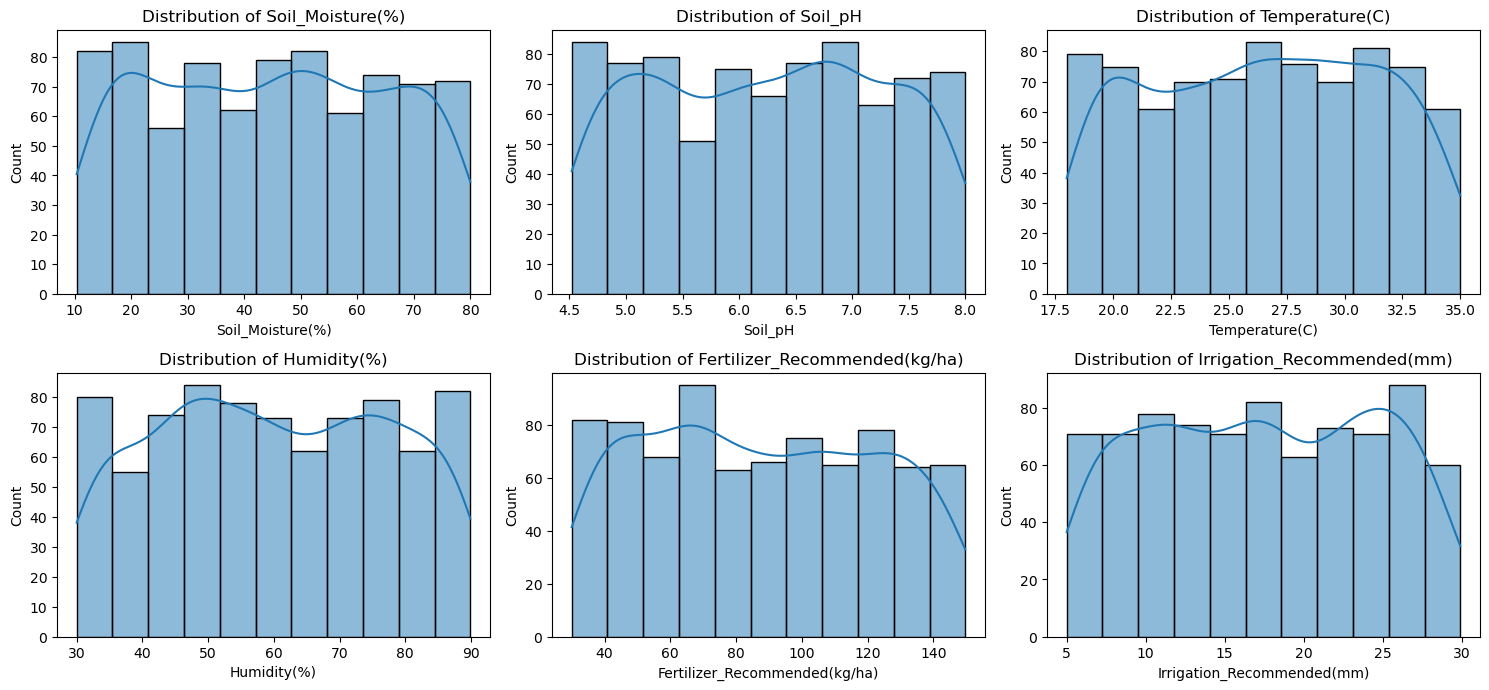

In [61]:
#visualization 
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number])
for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()    

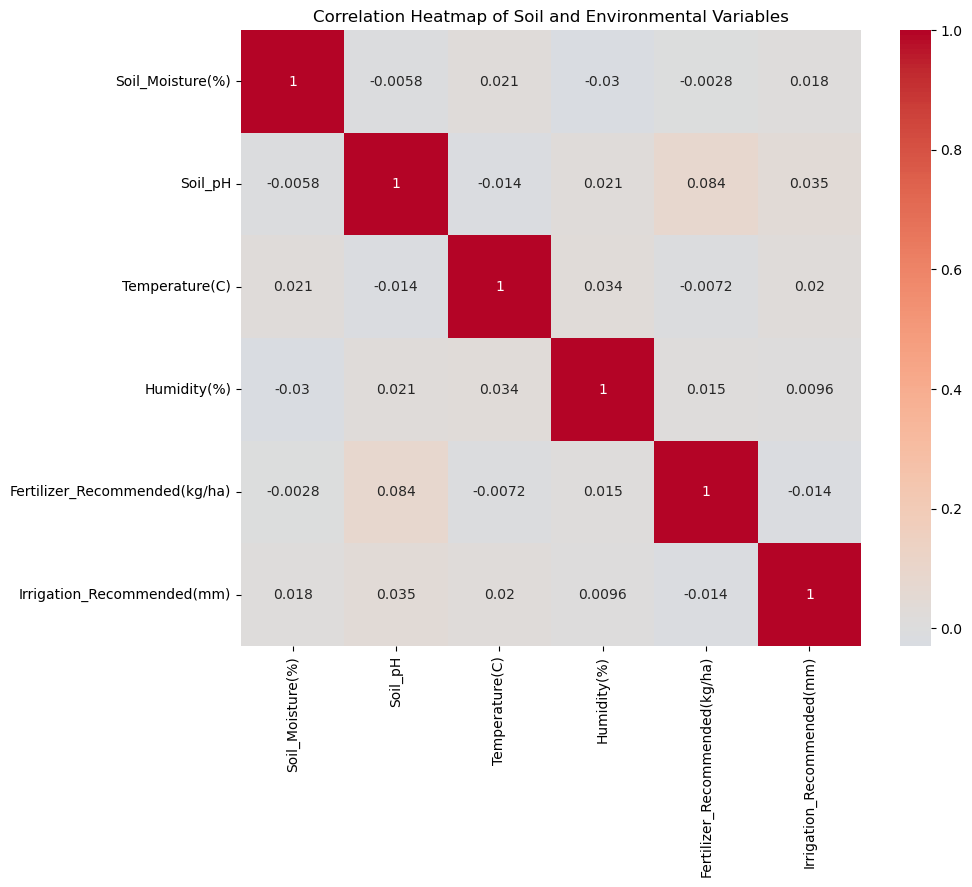

In [62]:
#correlation heatmap
plt.figure(figsize=(10,8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()

In [63]:
# Which variables most influence fertilizer recommendations?
print("\n=== Fertilizer Recommendation Correlations ===")
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(fertilizer_corr)



=== Fertilizer Recommendation Correlations ===
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083672
Humidity(%)                      0.015307
Soil_Moisture(%)                -0.002767
Temperature(C)                  -0.007215
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [64]:
# Determine the crop type with the highest average soil moisture
print("\n=== Crop Type with Highest Average Soil Moisture ===")
crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(crop_moisture)
highest_moisture_crop = crop_moisture.idxmax()
print(f"\nCrop with highest average soil moisture: {highest_moisture_crop}")


=== Crop Type with Highest Average Soil Moisture ===
Crop_Type
Wheat       47.357727
Maize       44.955032
Beans       44.395855
Tomatoes    43.819286
Lettuce     42.986358
Name: Soil_Moisture(%), dtype: float64

Crop with highest average soil moisture: Wheat


In [65]:
# Irrigation adjustments for crops with average temperatures above 30°C
print("\n=== Irrigation Recommendations for High Temperature Crops ===")
high_temp_crops = df[df['Temperature(C)'] > 30]
if not high_temp_crops.empty:
    avg_irrigation = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
    current_avg = avg_irrigation.mean()
    suggested_irrigation = current_avg * 1.2  # Increase by 20%
    
    print(f"\nCurrent average irrigation for crops >30°C: {current_avg:.2f} mm")
    print(f"Suggested irrigation adjustment: {suggested_irrigation:.2f} mm (+20%)")
    


=== Irrigation Recommendations for High Temperature Crops ===

Current average irrigation for crops >30°C: 17.67 mm
Suggested irrigation adjustment: 21.20 mm (+20%)


In [66]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)